# Project 4: Image Classification using CNNs on CIFAR-10 Dataset
### Understanding the Problem and Data:
Problem Understanding:
We aim to build a CNN model that can classify images from the CIFAR-10 dataset into one of the ten categories.

Data Collection and Exploration:
The CIFAR-10 dataset is a collection of 60,000 32x32 color images in 10 different classes. We'll explore the dataset to understand its characteristics.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Explore the data
num_classes = 10
print("Number of training samples:", len(x_train))
print("Number of test samples:", len(x_test))
print("Image shape:", x_train[0].shape)
print("Classes:", np.unique(y_train))


2023-10-02 22:00:19.286382: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of training samples: 50000
Number of test samples: 10000
Image shape: (32, 32, 3)
Classes: [0 1 2 3 4 5 6 7 8 9]


### Preprocessing and Augmentation:
Data Preprocessing:
We'll preprocess the data by normalizing the pixel values and one-hot encoding the labels.

In [2]:
from tensorflow.keras.utils import to_categorical

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


### Data Augmentation:
We'll augment the data to increase its diversity and improve model generalization.

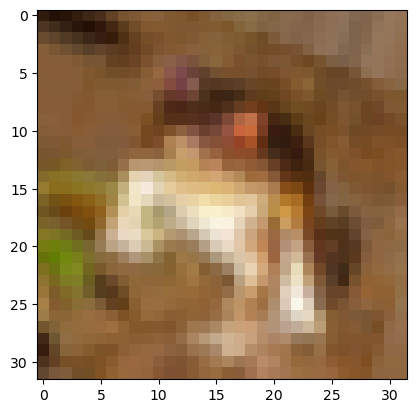

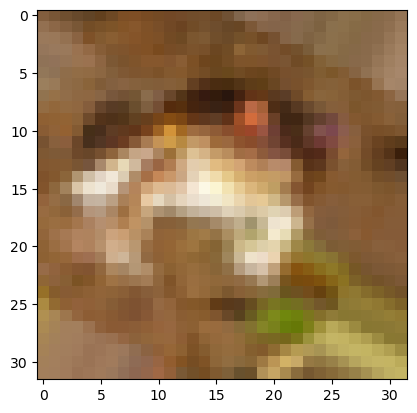

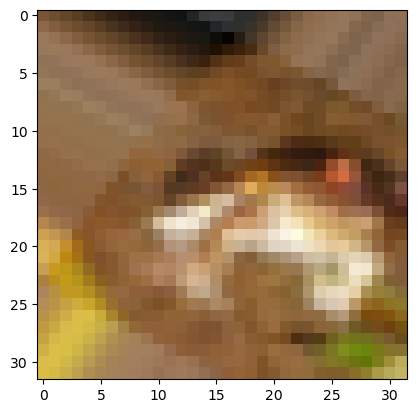

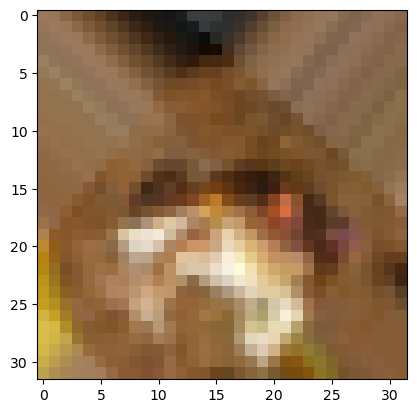

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Example of data augmentation
augmented_image = x_train[0]  # Choose an image for augmentation
augmented_image = augmented_image.reshape((1,) + augmented_image.shape)
i = 0
for batch in datagen.flow(augmented_image, save_prefix='aug', save_format='jpeg'):
    plt.figure(i)
    plt.imshow(batch[0])
    i += 1
    if i % 4 == 0:
        break
plt.show()


### Model Architecture Selection:
Selecting Neural Network Architecture:
We'll use a CNN architecture for image classification.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-10-02 22:02:52.159929: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-02 22:02:52.161235: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Customizing Architectures:
We've defined a CNN architecture with two convolutional layers followed by max-pooling, flattening, and two dense layers.

Model Training and Optimization:
Loss Function and Optimizer Selection:
We'll use categorical cross-entropy as the loss function and Adam as the optimizer.

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Hyperparameter Tuning:
We'll experiment with different learning rates, batch sizes, and regularization techniques.

In [10]:
import tensorflow as tf
# Experiment with hyperparameters
learning_rate = 0.001
batch_size = 64
epochs = 10

# Compile the model with customized hyperparameters
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Evaluation and Fine-Tuning:
Model Evaluation Metrics:
We'll use accuracy as the evaluation metric.

Model Evaluation:
We'll evaluate the model's performance using a validation set and analyze the results.

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Train the model and evaluate
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val))




Epoch 1/10


2023-10-02 22:06:28.591345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


704/704 [==============================] - ETA: 0s - loss: 1.5210 - accuracy: 0.4553

2023-10-02 22:07:14.859831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


704/704 [==============================] - 49s 63ms/step - loss: 1.5210 - accuracy: 0.4553 - val_loss: 1.4382 - val_accuracy: 0.4916
Epoch 2/10
704/704 [==============================] - 51s 73ms/step - loss: 1.1673 - accuracy: 0.5872 - val_loss: 1.0801 - val_accuracy: 0.6216
Epoch 3/10
704/704 [==============================] - 69s 97ms/step - loss: 1.0249 - accuracy: 0.6438 - val_loss: 1.0474 - val_accuracy: 0.6254
Epoch 4/10
704/704 [==============================] - 56s 79ms/step - loss: 0.9311 - accuracy: 0.6755 - val_loss: 0.9860 - val_accuracy: 0.6536
Epoch 5/10
704/704 [==============================] - 53s 76ms/step - loss: 0.8594 - accuracy: 0.7041 - val_loss: 0.9939 - val_accuracy: 0.6520
Epoch 6/10
704/704 [==============================] - 77s 110ms/step - loss: 0.7938 - accuracy: 0.7260 - val_loss: 0.9600 - val_accuracy: 0.6662
Epoch 7/10
704/704 [==============================] - 65s 93ms/step - loss: 0.7337 - accuracy: 0.7464 - val_loss: 0.9298 - val_accuracy: 0.6782
Ep